In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(array,bin_num,default=True):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def colour_plot_hist(array,bin_num,default=False):
    array = [row[0]-row[1] for row in array]
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def petro_plot_hist(array,bin_num=1000,default=False):
    array = [row[1] for row in array]
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def surface_brightness_plot_hist(array,bin_num=1000,default=False):
    array = [row[1]+2.5*np.log10(2*np.pi*row[4]*row[4]) for row in array]
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

# this notebook is looking at how the final selection compares to the MGS in each band pass
# each array has the exact same rows: 0 u, 1 r, 2 mr_petro, 3 z, 4 petroR50_r

In [53]:
mgs = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mgs_colours.npy')
galex = np.load('/home/calum/Documents/Mphys_data/cat_check/all_galex_colours.npy')
wise = np.load('/home/calum/Documents/Mphys_data/cat_check/all_wise_colours.npy')
ukidss = np.load('/home/calum/Documents/Mphys_data/cat_check/all_ukidss_colours.npy')
mw = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mw_colours.npy')

len(mgs), len(wise), len(galex), len(ukidss), len(mw)

(580316, 180639, 135232, 201406, 115684)

In [32]:
mgs_ur_bins, mgs_ur_n = colour_plot_hist(mgs,1000)
mw_ur_bins, mw_ur_n = colour_plot_hist(mw,1000)
galex_ur_bins, galex_ur_n = colour_plot_hist(galex,1000)
ukidss_ur_bins, ukidss_ur_n = colour_plot_hist(ukidss,1000)
wise_ur_bins, wise_ur_n = colour_plot_hist(wise,1000)

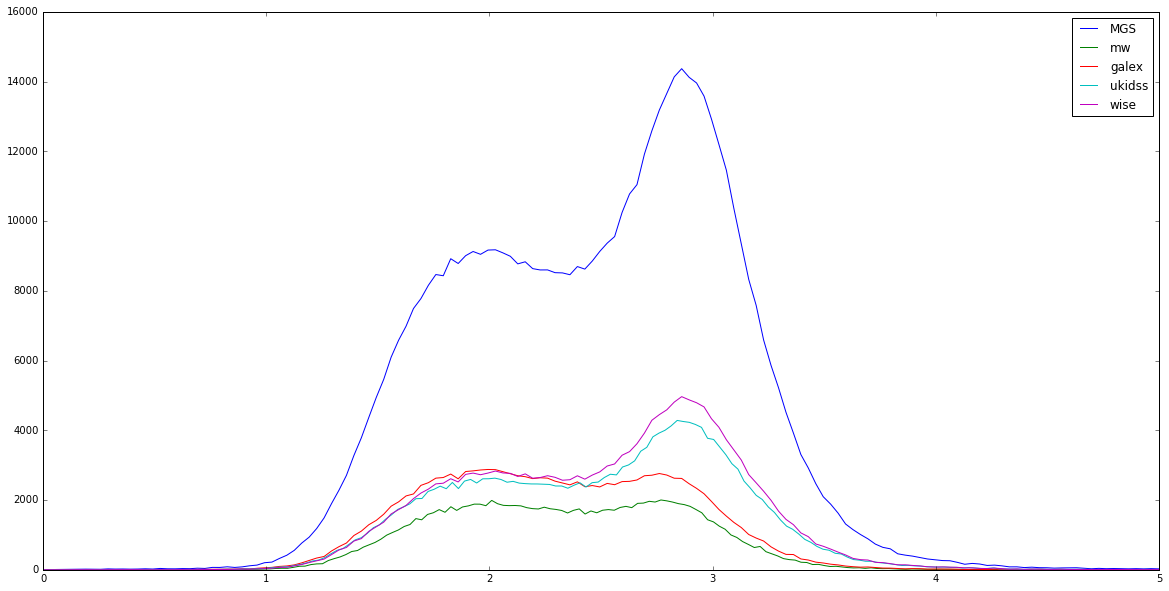

In [33]:
plt.figure(figsize=(20,10))
plt.plot(mgs_ur_bins[1:],mgs_ur_n, label='MGS')
plt.plot(mw_ur_bins[1:], mw_ur_n, label='mw')
plt.plot(galex_ur_bins[1:], galex_ur_n, label='galex')
plt.plot(ukidss_ur_bins[1:], ukidss_ur_n, label='ukidss')
plt.plot(wise_ur_bins[1:], wise_ur_n, label='wise')
plt.xlim(0,5)
plt.legend()

In [34]:
mgs_ur_bins, mgs_ur_n = colour_plot_hist(mgs,1000,True)
mw_ur_bins, mw_ur_n = colour_plot_hist(mw,1000,True)
galex_ur_bins, galex_ur_n = colour_plot_hist(galex,1000,True)
ukidss_ur_bins, ukidss_ur_n = colour_plot_hist(ukidss,1000,True)
wise_ur_bins, wise_ur_n = colour_plot_hist(wise,1000,True)

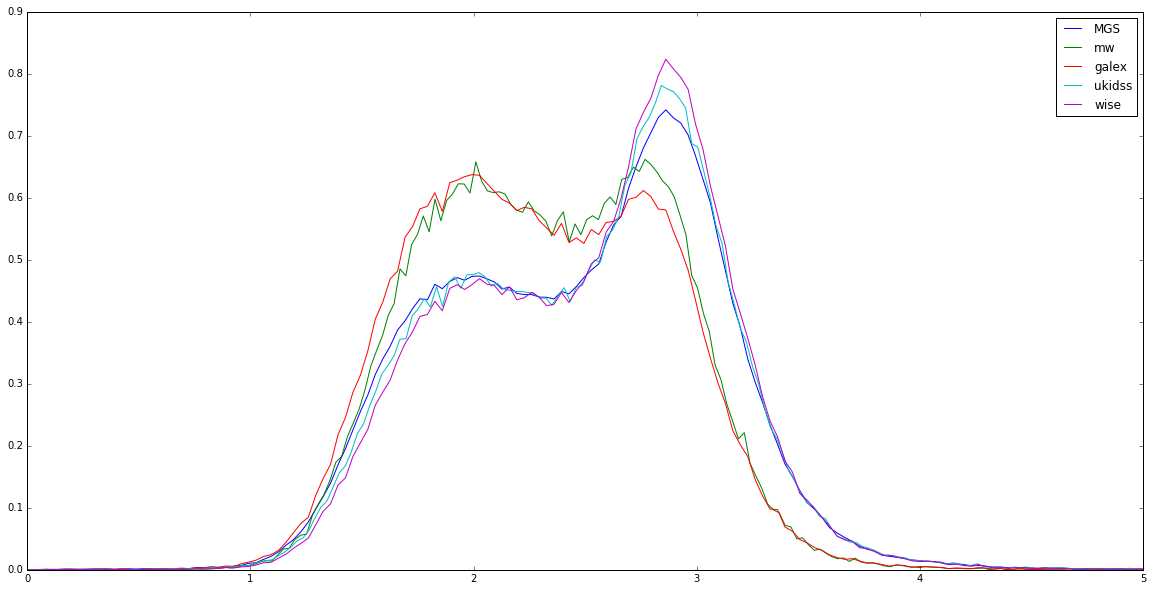

In [35]:
plt.figure(figsize=(20,10))
plt.plot(mgs_ur_bins[1:],mgs_ur_n, label='MGS')
plt.plot(mw_ur_bins[1:], mw_ur_n, label='mw')
plt.plot(galex_ur_bins[1:], galex_ur_n, label='galex')
plt.plot(ukidss_ur_bins[1:], ukidss_ur_n, label='ukidss')
plt.plot(wise_ur_bins[1:], wise_ur_n, label='wise')
plt.xlim(0,5)
plt.legend()

In [36]:
mgs_z = [row[3] for row in mgs]
mw_z = [row[3] for row in mw]
wise_z = [row[3] for row in wise]
galex_z = [row[3] for row in galex]
ukidss_z = [row[3] for row in ukidss]
np.median(mgs_z), np.median(mw_z), np.median(wise_z), np.median(galex_z), np.median(ukidss_z)

(0.10252184420824051,
 0.096321634948253632,
 0.10303033143281937,
 0.092281367629766464,
 0.10037333518266678)

In [37]:
mgs_petro_bins, mgs_petro_n = petro_plot_hist(mgs)
mw_petro_bins, mw_petro_n = petro_plot_hist(mw)
galex_petro_bins, galex_petro_n = petro_plot_hist(galex)
ukidss_petro_bins, ukidss_petro_n = petro_plot_hist(ukidss)
wise_petro_bins, wise_petro_n = petro_plot_hist(wise)

(13, 20)

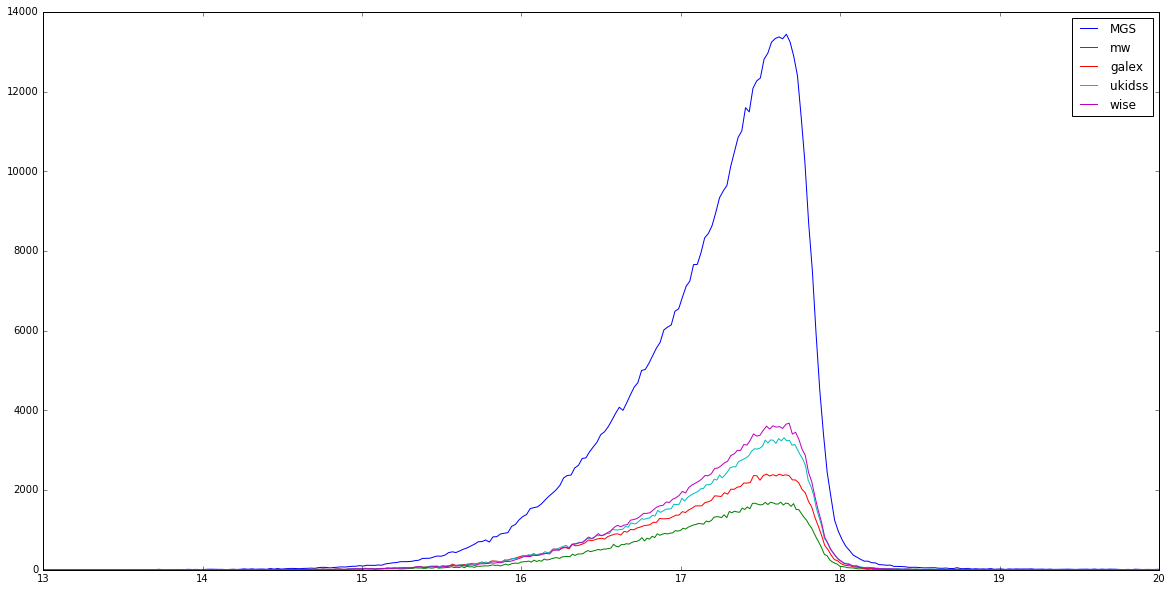

In [40]:
plt.figure(figsize=(20,10))
plt.plot(mgs_petro_bins[1:],mgs_petro_n, label='MGS')
plt.plot(mw_petro_bins[1:], mw_petro_n, label='mw')
plt.plot(galex_petro_bins[1:], galex_petro_n, label='galex')
plt.plot(ukidss_petro_bins[1:], ukidss_petro_n, label='ukidss')
plt.plot(wise_petro_bins[1:], wise_petro_n, label='wise')
plt.legend()
plt.xlim(13,20)

In [45]:
mgs_petro_bins, mgs_petro_n = petro_plot_hist(mgs,default=True)
mw_petro_bins, mw_petro_n = petro_plot_hist(mw,default=True)
galex_petro_bins, galex_petro_n = petro_plot_hist(galex,default=True)
ukidss_petro_bins, ukidss_petro_n = petro_plot_hist(ukidss,default=True)
wise_petro_bins, wise_petro_n = petro_plot_hist(wise,default=True)

(13, 20)

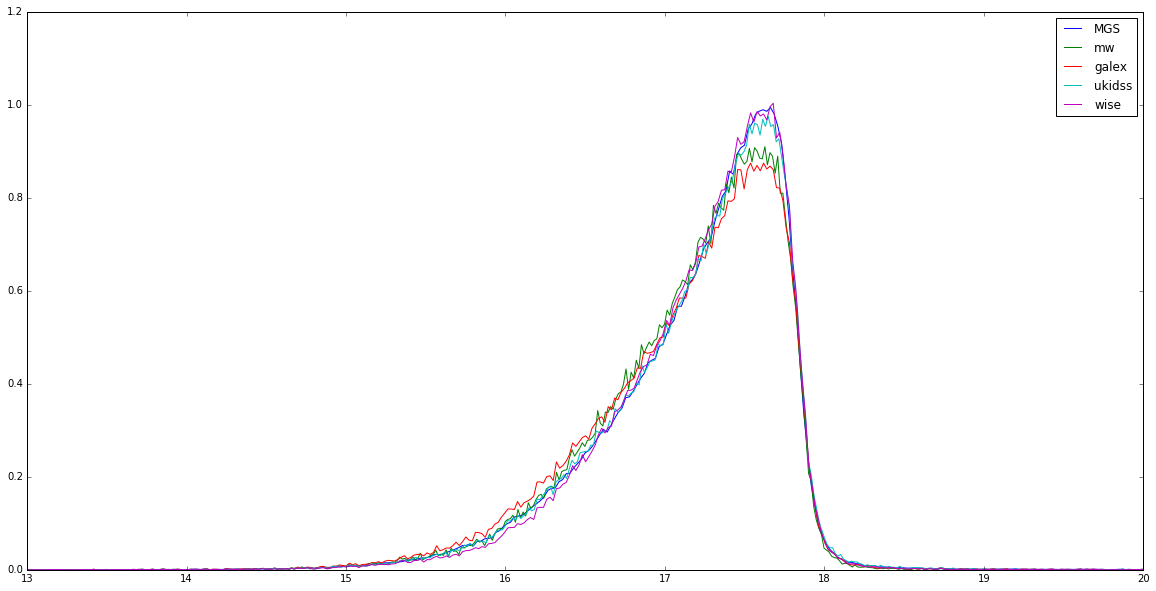

In [46]:
plt.figure(figsize=(20,10))
plt.plot(mgs_petro_bins[1:],mgs_petro_n, label='MGS')
plt.plot(mw_petro_bins[1:], mw_petro_n, label='mw')
plt.plot(galex_petro_bins[1:], galex_petro_n, label='galex')
plt.plot(ukidss_petro_bins[1:], ukidss_petro_n, label='ukidss')
plt.plot(wise_petro_bins[1:], wise_petro_n, label='wise')
plt.legend()
plt.xlim(13,20)

In [59]:
mgs_surface_bins, mgs_surface_n = surface_brightness_plot_hist(mgs)
mw_surface_bins, mw_surface_n = surface_brightness_plot_hist(mw)
galex_surface_bins, galex_surface_n = surface_brightness_plot_hist(galex)
ukidss_surface_bins, ukidss_surface_n = surface_brightness_plot_hist(ukidss)
wise_surface_bins, wise_surface_n = surface_brightness_plot_hist(wise)

(15, 25)

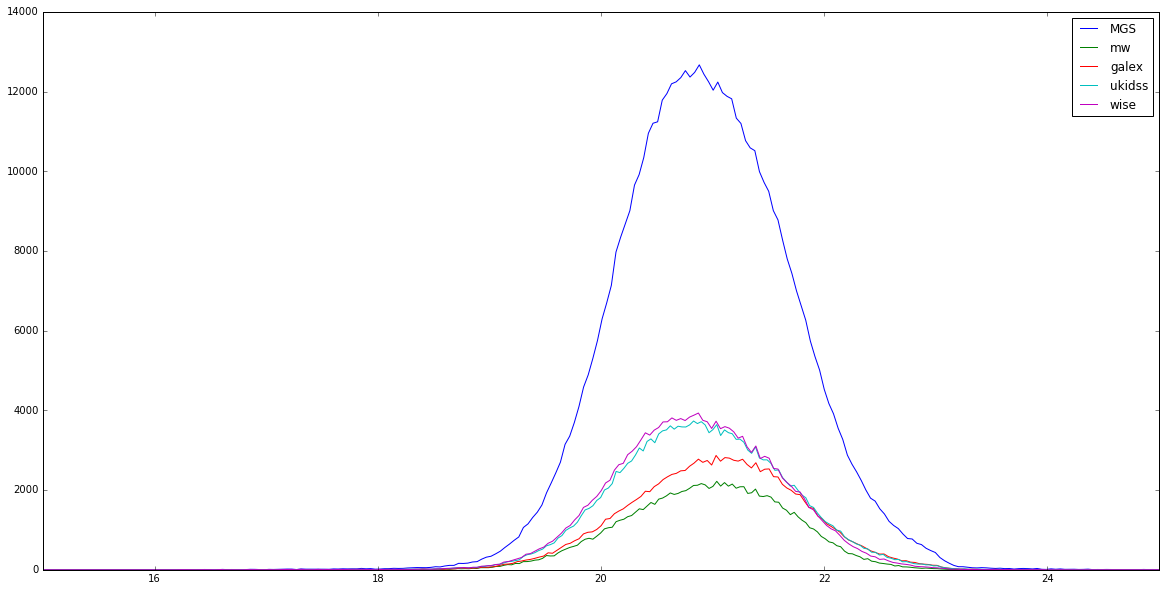

In [60]:
plt.figure(figsize=(20,10))
plt.plot(mgs_surface_bins[1:],mgs_surface_n, label='MGS')
plt.plot(mw_surface_bins[1:], mw_surface_n, label='mw')
plt.plot(galex_surface_bins[1:], galex_surface_n, label='galex')
plt.plot(ukidss_surface_bins[1:], ukidss_surface_n, label='ukidss')
plt.plot(wise_surface_bins[1:], wise_surface_n, label='wise')
plt.legend()
plt.xlim(15,25)

In [61]:
mgs_surface_bins, mgs_surface_n = surface_brightness_plot_hist(mgs,default=True)
mw_surface_bins, mw_surface_n = surface_brightness_plot_hist(mw,default=True)
galex_surface_bins, galex_surface_n = surface_brightness_plot_hist(galex,default=True)
ukidss_surface_bins, ukidss_surface_n = surface_brightness_plot_hist(ukidss,default=True)
wise_surface_bins, wise_surface_n = surface_brightness_plot_hist(wise,default=True)

(15, 25)

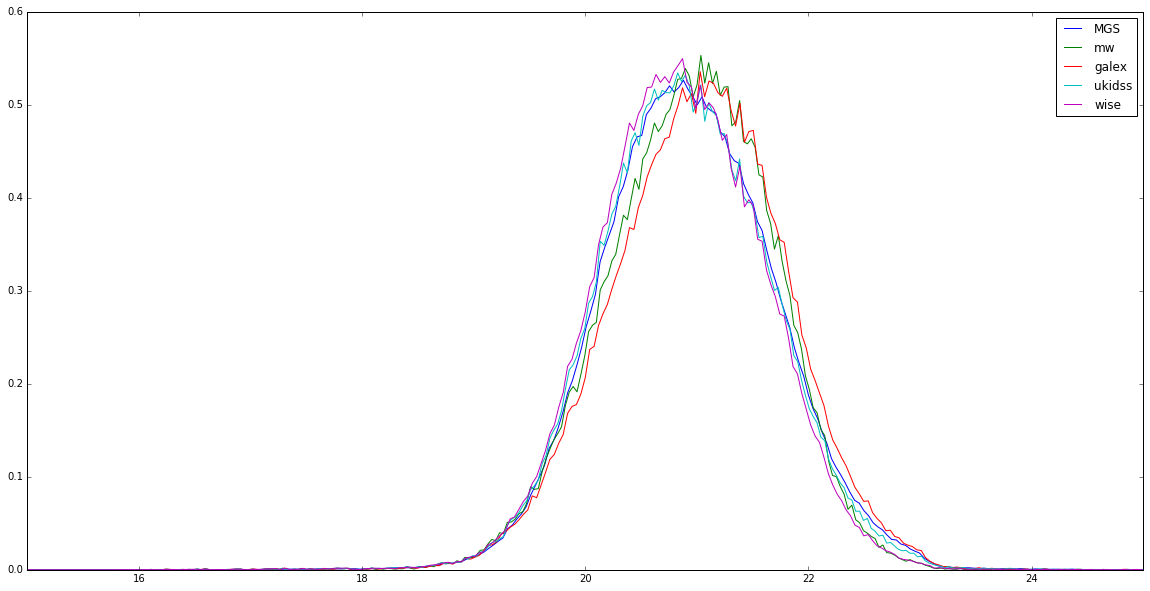

In [63]:
plt.figure(figsize=(20,10))
plt.plot(mgs_surface_bins[1:],mgs_surface_n, label='MGS')
plt.plot(mw_surface_bins[1:], mw_surface_n, label='mw')
plt.plot(galex_surface_bins[1:], galex_surface_n, label='galex')
plt.plot(ukidss_surface_bins[1:], ukidss_surface_n, label='ukidss')
plt.plot(wise_surface_bins[1:], wise_surface_n, label='wise')
plt.legend()
plt.xlim(15,25)